In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sb

In [ ]:
data = datasets.load_iris()

In [ ]:
iris = pd.DataFrame(data = data.data, columns = data.feature_names)
iris['Target'] = [data.target_names[i] for i in data.target]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

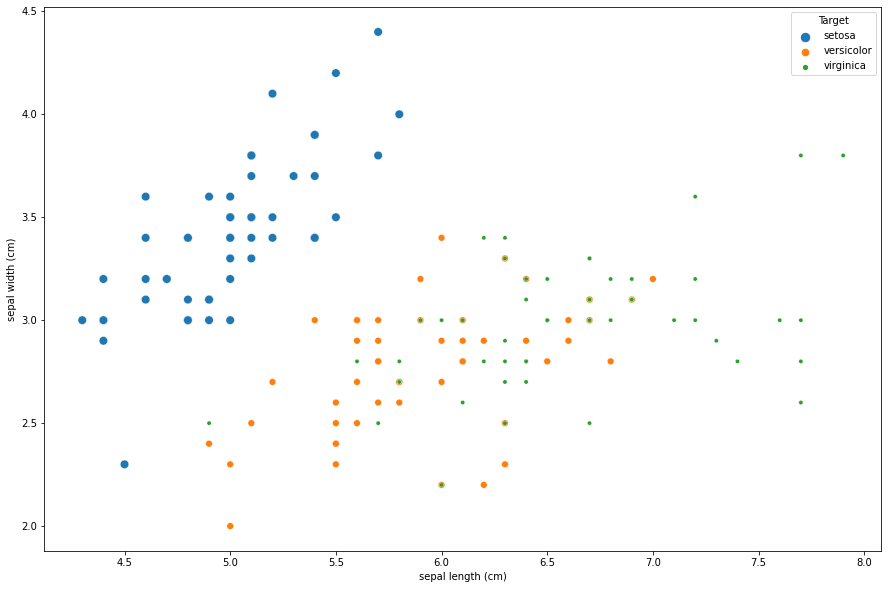

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
pl = sb.scatterplot(data = iris,x ='sepal length (cm)',y = 'sepal width (cm)',hue = 'Target',size = 'Target'
)

In [ ]:
from sklearn.cluster import KMeans
eval = []
models = [KMeans(n_clusters=i, random_state=0) for i in range(1,8)]
for i in range(1,8):
  models[i-1].fit(data.data)
  eval.append(models[i-1].inertia_)

In [ ]:
eval

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213]

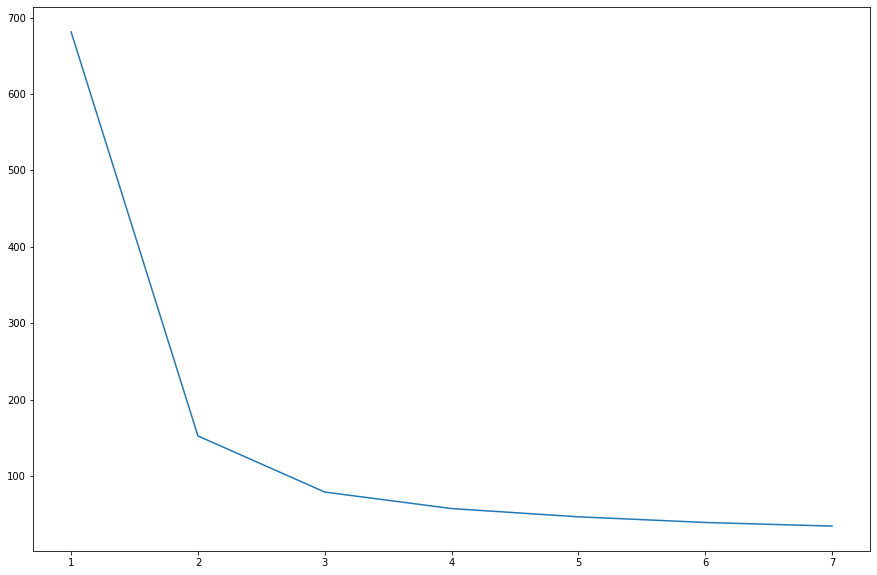

In [ ]:
plt.plot(list(range(1,8)),eval)

In [ ]:
out = models[2].predict(data.data)

In [ ]:
iris['out'] = [data.target_names[i] for i in out]

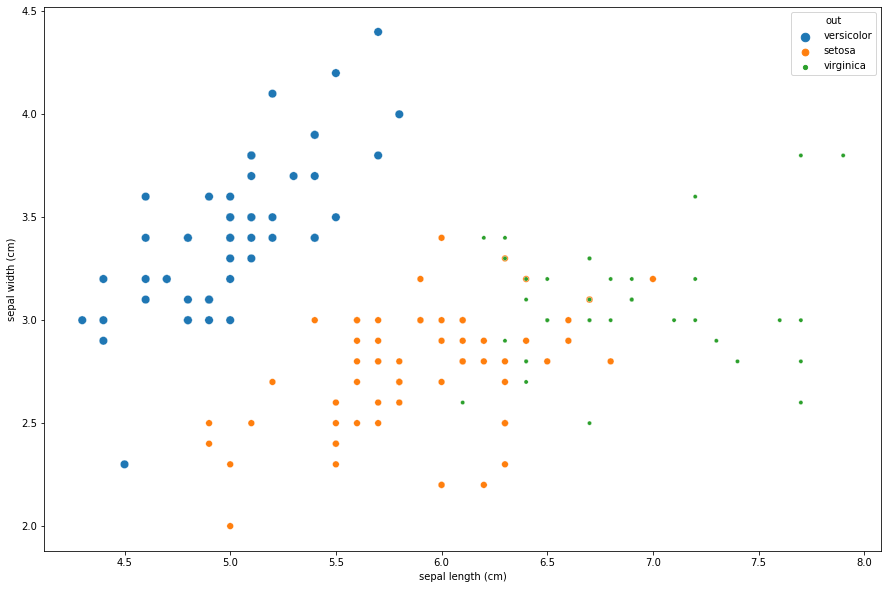

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
pl = sb.scatterplot(data = iris,x ='sepal length (cm)',y = 'sepal width (cm)',hue = 'out',size = 'out'
)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data.data, models[2].labels_, metric = 'euclidean')
print('Silhouette score :- %0.3f' % score)

Silhouette score :- 0.553


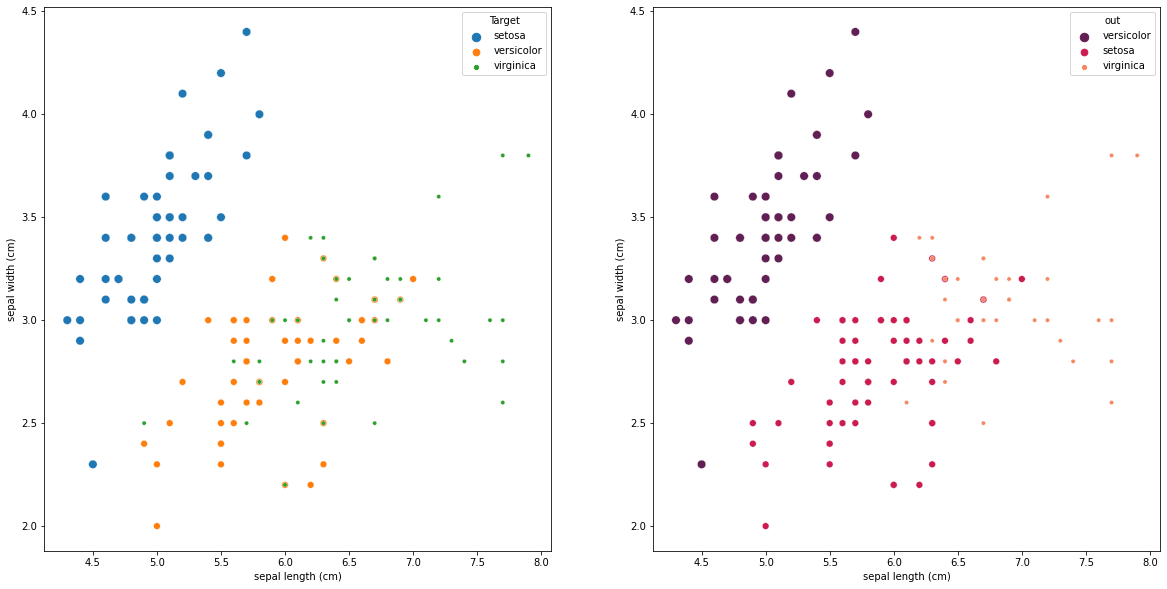

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]

plt.subplot(1,2,1)
pl = sb.scatterplot(data = iris,x ='sepal length (cm)',y = 'sepal width (cm)',hue = 'Target',size = 'Target'
)
plt.subplot(1,2,2)
pl = sb.scatterplot(data = iris,x ='sepal length (cm)',y = 'sepal width (cm)',hue = 'out',size = 'out',palette = 'rocket'
)
